In [1]:
import numpy as np
import pints
import pints.plot
import pints_smol_moments_jit as toy
import matplotlib.pyplot as plt
from scipy.stats import moment
import pandas as pd



Select the desired model, true parameters and time array.

Then simulate to get synthetic data

In [2]:

model = toy.SmolModel(None,None)


true_parameters = [0.0004, 500]


times = np.linspace(20, 97, 78)

df = pd.read_csv('s11_inference_input_multi_well_t_20.csv', header=None)
org_values = np.transpose(df.to_numpy())


# 1st moment is mean, 1st centred moment should be array 6
centred_moment_1 = moment(org_values, moment=1, axis=1)
centred_moment_2 = moment(org_values, moment=2, axis=1)
centred_moment_3 = moment(org_values, moment=3, axis=1)
centred_moment_4 = moment(org_values, moment=4, axis=1)
centred_moment_5 = moment(org_values, moment=5, axis=1)

centred_moments = np.zeros((78,5))
centred_moments[:,0] = centred_moment_1
centred_moments[:,1] = centred_moment_2
centred_moments[:,2] = centred_moment_3
centred_moments[:,3] = centred_moment_4
centred_moments[:,4] = centred_moment_5

# print(centred_moments.shape)


Add noise to the data (using random sampling from normal distribution)

In [3]:

# noise = 9
# values = org_values + np.random.normal(0, noise, org_values.shape)

size_noise = 5
noise_value = 25
# # Create a list with the specified size filled with a placeholder value
noise_arr = [noise_value for _ in range(size_noise)]
noise_arr[0] = 1
noise_arr[1] = 10


Set-up pints problem and log likelihoods

In [4]:

problem = pints.MultiOutputProblem(model, times, centred_moments)

log_likelihood = pints.GaussianLogLikelihood(problem)
# log_likelihood_2 = pints.GaussianIntegratedLogUniformLogLikelihood(problem)

print('Original problem dimension: ' + str(problem.n_parameters()))
print('New dimension: ' + str(log_likelihood.n_parameters()))
# print('New dimension: ' + str(log_likelihood_2.n_parameters()))

true_parameters += noise_arr
# print(true_parameters)



Original problem dimension: 2
New dimension: 7


Create uniform log prior

In [5]:

# Define the size of the list
size = 7
placeholder_lower_value = 0
placeholder_upper_value = 1000
 
# Create a list with the specified size filled with a placeholder value
prior_arr_lower = [placeholder_lower_value for _ in range(size)]
prior_arr_upper = [placeholder_upper_value for _ in range(size)]
prior_arr_lower[0] = 0.0001
prior_arr_upper[0] = 0.001
prior_arr_lower[1] = 1
prior_arr_upper[1] = 10000
prior_arr_lower[2] = 0
prior_arr_upper[2] = 10
prior_arr_lower[3] = 0
prior_arr_upper[3] = 20
prior_arr_lower[4] = 0
prior_arr_upper[4] = 2000
prior_arr_lower[5] = 0
prior_arr_upper[5] = 20000
prior_arr_lower[6] = 0
prior_arr_upper[6] = 1000000


# log_prior = pints.UniformLogPrior(
#     [0.000001, 1, 1],
#     [0.01, 10000, 100]
#     )
log_prior = pints.UniformLogPrior(
    prior_arr_lower,
    prior_arr_upper
    )

# Create a posterior log-likelihood (log(likelihood * prior))
log_posterior = pints.LogPosterior(log_likelihood, log_prior)


/var/folders/lt/9g_w308946v4x_5mqxc951qr0000gr/T/ipykernel_27944/1970584665.py:29: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  log_prior = pints.UniformLogPrior(


In [6]:

xs = [
    np.array(true_parameters) * 0.9,
    np.array(true_parameters) * 1.05,
    np.array(true_parameters) * 1.15,
]
ITERS = 5000
mcmc = pints.MCMCController(log_posterior, 3, xs,method=pints.SliceDoublingMCMC)
mcmc.set_max_iterations(ITERS)
chains = mcmc.run()
print(chains)



Using Slice Sampling - Doubling
Generating 3 chains.
Running in sequential mode.
Iter. Eval. Time m:s
0     3       0:00.3
1     495     0:01.3
2     954     0:02.3
3     1371    0:03.2
20    8814    0:20.7
40    17871   0:41.7
60    29769   1:06.6
80    43422   1:33.8
100   60087   2:04.6
120   78957   2:37.4
140   100380   3:13.5
160   123576   3:52.1
180   150891   4:36.0
200   179349   5:20.9
220   209406   6:07.8
240   242310   6:57.7
260   276807   7:49.2
280   314346   8:43.6
300   353409   9:39.5
320   394977  10:40.3
340   438396  11:41.3
360   483855  12:45.5
380   532023  13:52.5


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pints/_log_likelihoods.py:832: RuntimeWarning: invalid value encountered in divide
  - np.sum(error**2, axis=0) / (2 * sigma**2))


400   582957  15:03.9
420   635058  16:19.3
440   686541  17:32.1
460   739182  18:47.3
480   790476  20:00.5
500   842046  21:19.7
520   893505  22:45.2
540   944922  24:07.1
560   996294  25:32.8
580   1047918  26:57.6
600   1100151  28:23.8
620   1151781  29:50.5
640   1203486  31:16.7
660   1255491  32:42.1
680   1306395  34:07.0
700   1358739  35:34.7
720   1410711  37:01.1
740   1462029  38:28.6
760   1513728  39:55.8
780   1565304  41:23.4
800   1617144  42:53.6
820   1668636  44:19.5
840   1719831  45:46.4
860   1771137  47:11.9
880   1822560  48:38.0
900   1873539  50:04.5
920   1925364  51:27.3
940   1976760  52:46.8
960   2028447  54:08.4
980   2080134  55:31.3
1000  2130675  56:50.3
1020  2182269  58:11.4
1040  2233944  59:31.8
1060  2286087  60:55.4
1080  2337819  62:16.5
1100  2390112  63:37.0
1120  2441607  64:58.2
1140  2493249  66:20.0
1160  2544798  67:41.4
1180  2596245  69:02.0
1200  2647950  70:23.5
1220  2699847  71:45.4
1240  2750991  73:06.2
1260  2802231  74:28

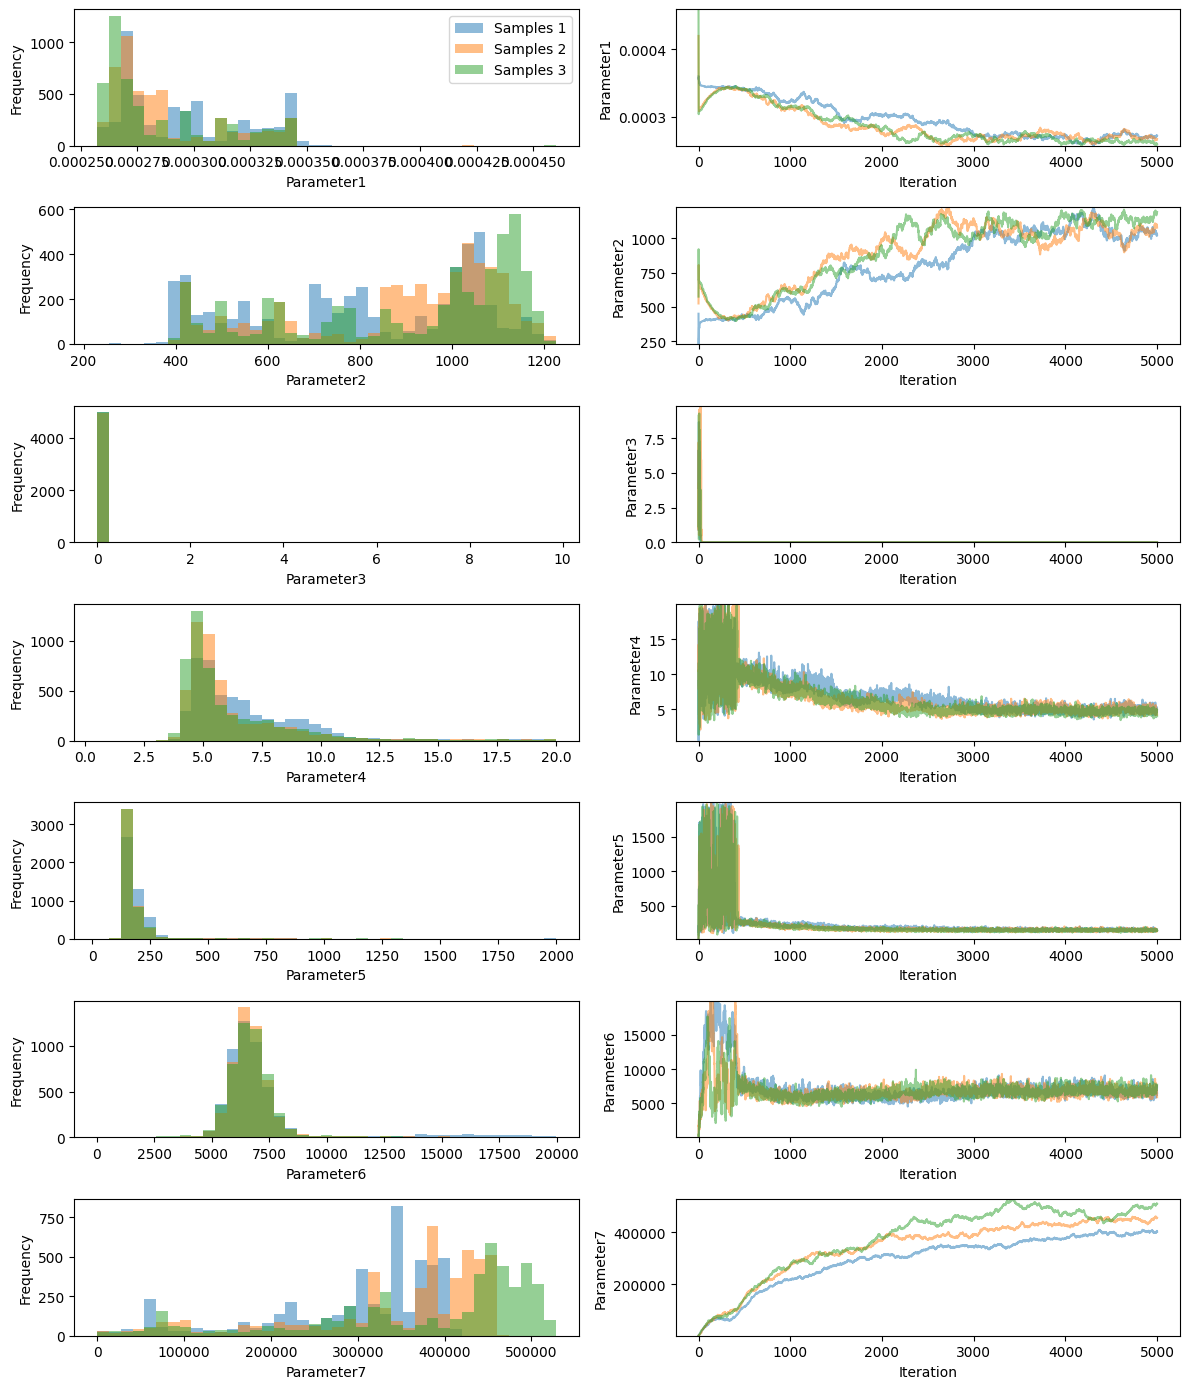

In [7]:

pints.plot.trace(chains)
plt.savefig("mcmc.png")
plt.show()


In [8]:

# ITERS = 100
AllChains = chains[0,:-int(3*ITERS/4),:]
# np.asarray(AllChains)
print(np.shape(AllChains))
print(AllChains[0])
print(AllChains)


(1250, 7)
[3.60e-04 4.50e+02 9.00e-01 9.00e+00 2.25e+01 2.25e+01 2.25e+01]
[[3.60000000e-004 4.50000000e+002 9.00000000e-001 ... 2.25000000e+001
  2.25000000e+001 2.25000000e+001]
 [3.55347543e-004 2.29958082e+002 6.63405277e+000 ... 2.17542383e+002
  1.23989151e+002 1.85078965e+003]
 [3.56256033e-004 2.70545695e+002 3.87319239e+000 ... 1.16118883e+002
  3.32527101e+002 1.44739841e+003]
 ...
 [3.20984355e-004 5.63650952e+002 1.63659280e-162 ... 2.13659280e+002
  6.53748875e+003 2.36391069e+005]
 [3.21344989e-004 5.62191976e+002 1.59112302e-162 ... 2.05550177e+002
  6.53040897e+003 2.35269607e+005]
 [3.21559844e-004 5.61179971e+002 1.59230644e-162 ... 2.37286084e+002
  6.34708229e+003 2.36653014e+005]]


In [ ]:

for I in range(3-1):
    AllChains_add = chains[I+1,:-int(2*ITERS/4),:]
    AllChains = np.concatenate((AllChains,AllChains_add), axis=0)


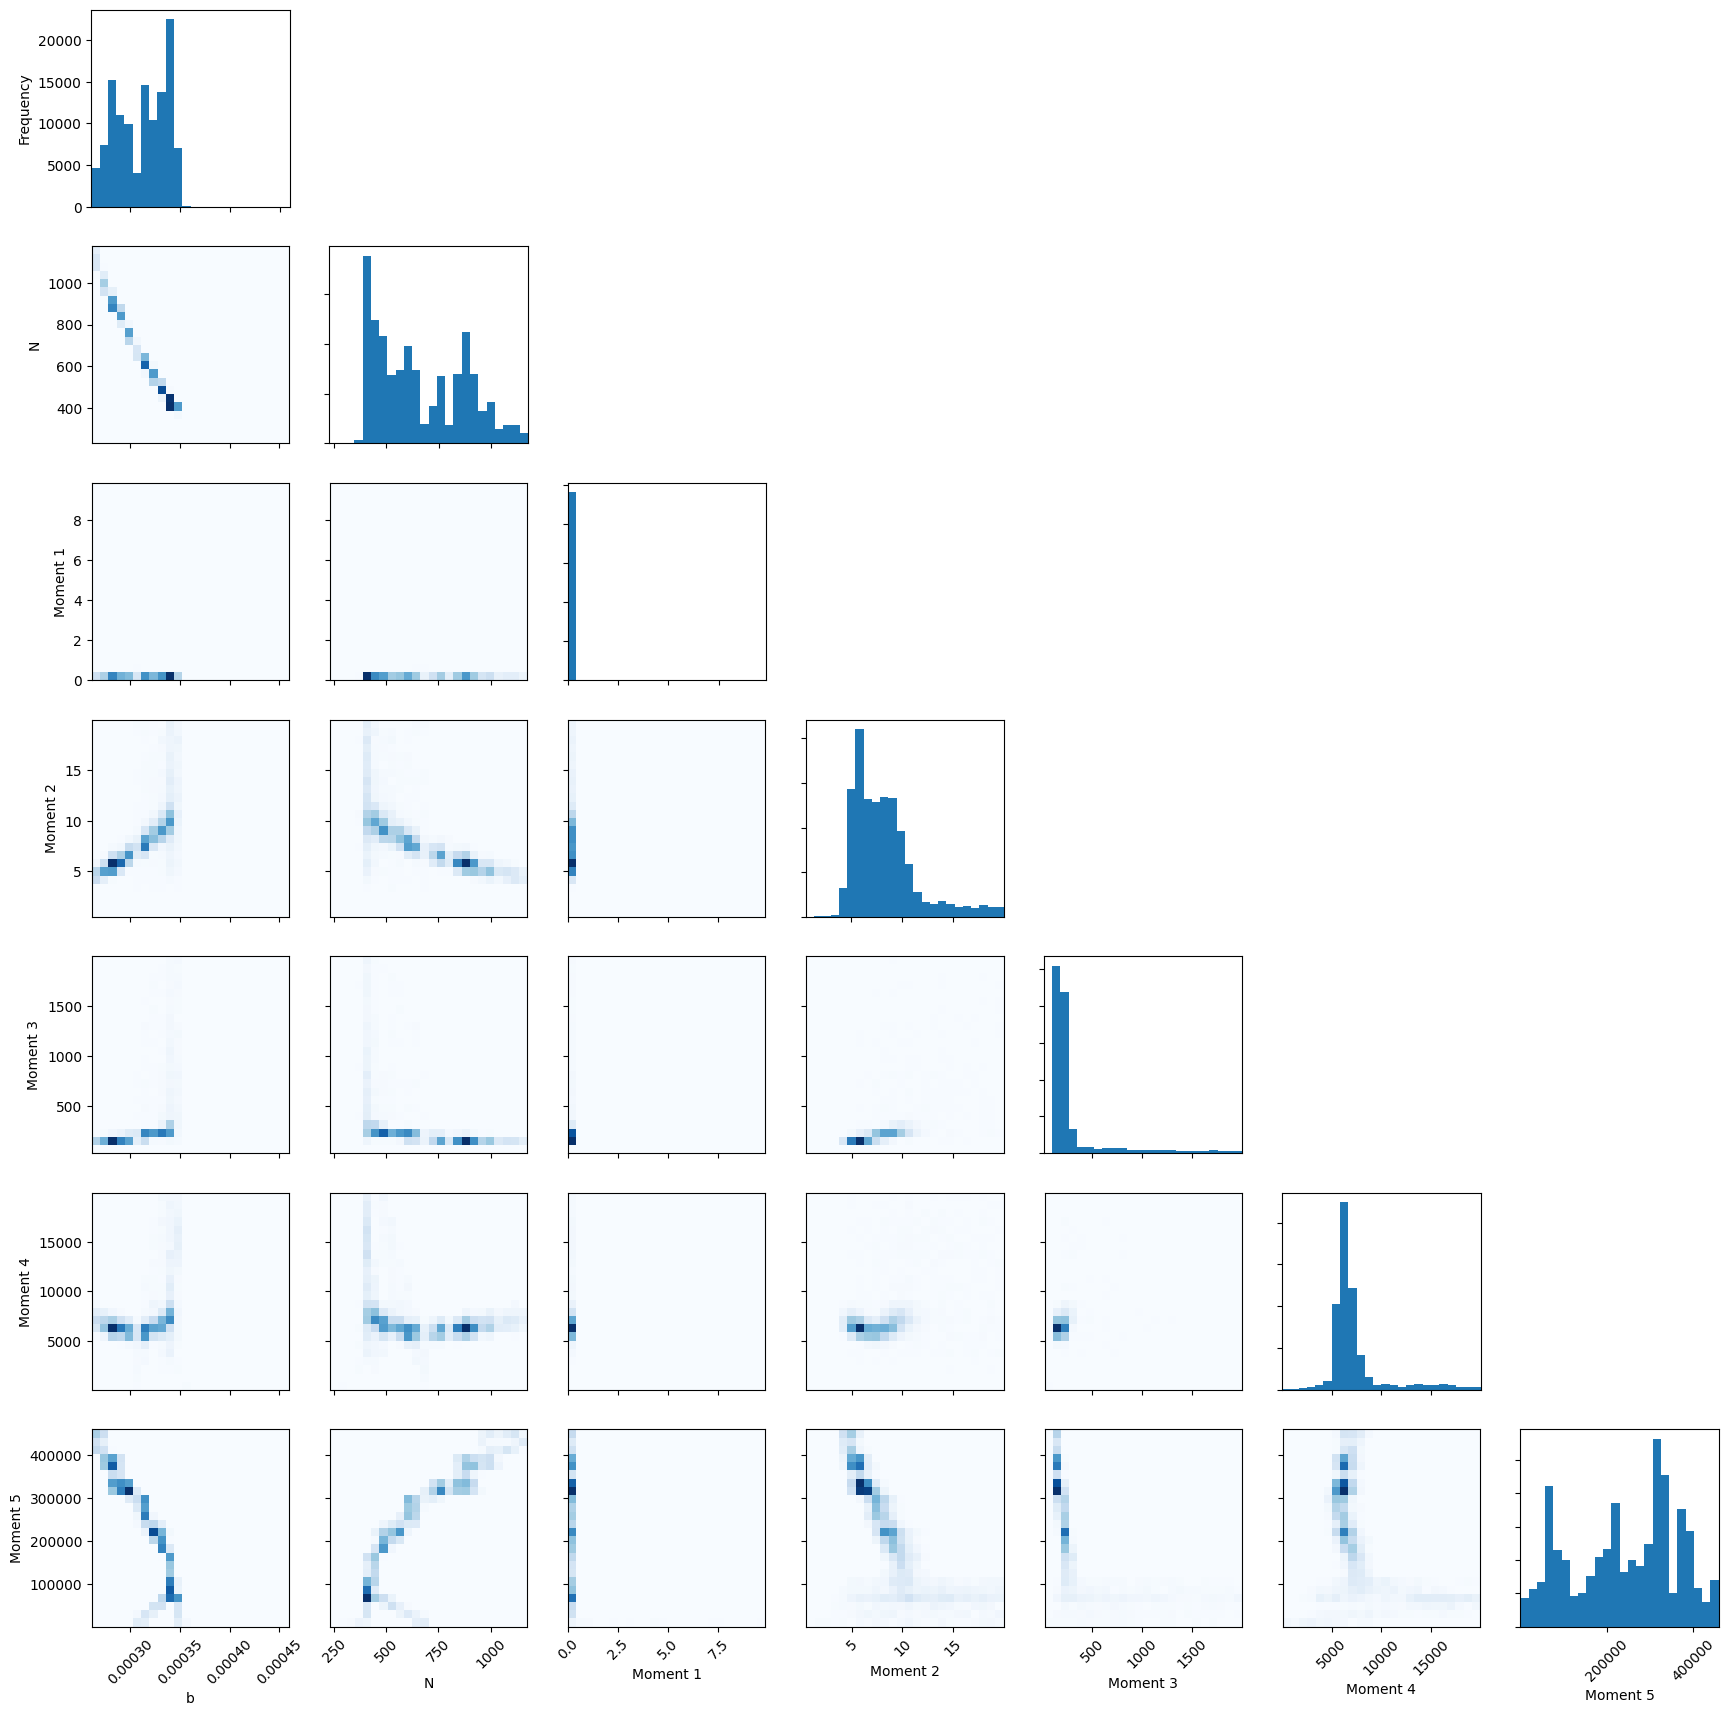

In [10]:


parameter_names = ["b","N", "Moment 1", "Moment 2", "Moment 3", "Moment 4", "Moment 5"]
#pints.plot.pairwise(chains, kde=True, parameter_names=parameter_names)

pints.plot.pairwise(AllChains, heatmap=True, 
                    parameter_names=["b","N", "Moment 1", "Moment 2", "Moment 3", "Moment 4", "Moment 5"])
plt.show()